This is the project on Imdb movies data set.

The task is to predict whether a movie will be a success or not based on its genre and director name.

# we will install the used libraries in this project.

In [2]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np

C:\Users\dell3\AppData\Local\Temp\ipykernel_1756\1856634837.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Load IMDb dataset into a Pandas DataFrame

In [3]:
imdb_df = pd.read_csv('IMDbMovies-Clean.csv')
imdb_df

,Title,Summary,Director,Writer,Main Genres,Motion Picture Rating,Release Year,Runtime (Minutes),Rating (Out of 10),Number of Ratings (in thousands),Budget (in millions),Gross in US & Canada (in millions),Gross worldwide (in millions),Opening Weekend in US & Canada,Gross Opening Weekend (in millions)
0,Napoleon,An epic that details the checkered rise and fa...,Ridley Scott,David Scarpa,"Action,Adventure,Biography",R,2023.0,158.0,6.7,38.0,NaN,37.514,84.968,11.26.2023,20.639
1,The Hunger Games: The Ballad of Songbirds & Sn...,Coriolanus Snow mentors and develops feelings ...,Francis Lawrence,"Michael Lesslie,Michael Arndt,Suzanne Collins","Action,Adventure,Drama",PG-13,2023.0,157.0,7.2,37.0,100.0,105.043,191.729,11.19.2023,44.607
2,The Killer,"After a fateful near-miss, an assassin battles...",David Fincher,"Andrew Kevin Walker,Luc Jacamon,Alexis Nolent","Action,Adventure,Crime",R,2023.0,118.0,6.8,117.0,NaN,NaN,0.421,NaN,NaN
3,Leo,A 74-year-old lizard named Leo and his turtle ...,"David Wachtenheim,Robert Smigel,Robert Marianetti","Paul Sado,Robert Smigel,Adam Sandler","Animation,Comedy,Family",PG,2023.0,102.0,7.0,10.0,NaN,NaN,NaN,NaN,NaN
4,Thanksgiving,"After a Black Friday riot ends in tragedy, a m...",Eli Roth,"Eli Roth,Jeff Rendell","Horror,Mystery,Thriller",R,2023.0,106.0,7.0,9.1,NaN,25.409,29.667,11.19.2023,10.306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9078,Over the Moon,"In this animated musical, a girl builds a rock...","John Kahrs,Glen Keane","Jennifer Yee McDevitt,Audrey Wells,Alice Wu","Animation,Adventure,Comedy",PG,2020.0,95.0,6.3,24.0,NaN,NaN,NaN,NaN,NaN
9079,Young Adam,A young drifter working on a river barge disru...,David Mackenzie,"Alexander Trocchi,David Mackenzie","Crime,Drama",NC-17,2003.0,98.0,6.4,15.0,6.4,0.767,2.562,04.18.2004,0.050
9080,The Greatest Show on Earth,"The dramatic lives of trapeze artists, a clown...",Cecil B. DeMille,"Theodore St. John,Fredric M. Frank,Barré Lyndon","Drama,Family,Romance",Passed,1952.0,152.0,6.5,16.0,4.0,36.000,36.000,NaN,NaN
9081,Deep Water,A group of international passengers en route f...,Renny Harlin,Pete Bridges,Thriller,Passed,1952.0,152.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Display the first 5 rows of the dataset

In [4]:
print(imdb_df.head())

                                               Title  \
0                                           Napoleon   
1  The Hunger Games: The Ballad of Songbirds & Sn...   
2                                         The Killer   
3                                                Leo   
4                                       Thanksgiving   

                                             Summary  \
0  An epic that details the checkered rise and fa...   
1  Coriolanus Snow mentors and develops feelings ...   
2  After a fateful near-miss, an assassin battles...   
3  A 74-year-old lizard named Leo and his turtle ...   
4  After a Black Friday riot ends in tragedy, a m...   

                                            Director  \
0                                       Ridley Scott   
1                                   Francis Lawrence   
2                                      David Fincher   
3  David Wachtenheim,Robert Smigel,Robert Marianetti   
4                                           El

# Check For Info

In [27]:
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4514 entries, 1 to 9079
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Title                                4514 non-null   object 
 1   Summary                              4514 non-null   object 
 2   Director                             4514 non-null   object 
 3   Writer                               4514 non-null   object 
 4   Main Genres                          4514 non-null   object 
 5   Motion Picture Rating                4514 non-null   object 
 6   Release Year                         4514 non-null   float64
 7   Runtime (Minutes)                    4514 non-null   float64
 8   Rating (Out of 10)                   4514 non-null   float64
 9   Number of Ratings (in thousands)     4514 non-null   float64
 10  Budget (in millions)                 4514 non-null   float64
 11  Gross in US & Canada (in millions) 

# Check for missing values

In [28]:
print(imdb_df.isnull().sum())

Title                                  0
Summary                                0
Director                               0
Writer                                 0
Main Genres                            0
Motion Picture Rating                  0
Release Year                           0
Runtime (Minutes)                      0
Rating (Out of 10)                     0
Number of Ratings (in thousands)       0
Budget (in millions)                   0
Gross in US & Canada (in millions)     0
Gross worldwide (in millions)          0
Opening Weekend in US & Canada         0
Gross Opening Weekend (in millions)    0
dtype: int64


# Remove rows with missing values

In [29]:
imdb_df = imdb_df.dropna()

# Display summary statistics

In [30]:
print(imdb_df.describe())

       Release Year  Runtime (Minutes)  Rating (Out of 10)  \
count   4514.000000        4514.000000         4514.000000   
mean    2003.940408         109.048294            6.560877   
std       12.557733          24.025448            0.947451   
min     1927.000000           2.000000            1.900000   
25%     1996.000000          96.000000            6.000000   
50%     2006.000000         107.000000            6.600000   
75%     2014.000000         121.000000            7.200000   
max     2023.000000         393.000000            9.300000   

       Number of Ratings (in thousands)  Budget (in millions)  \
count                       4514.000000           4514.000000   
mean                         165.262827             72.630246   
std                          231.650857            738.488505   
min                            1.100000              0.002000   
25%                           42.000000             11.050000   
50%                           88.000000            

# Count movies released and Plot the result

Text(0, 0.5, 'Number of Movies')

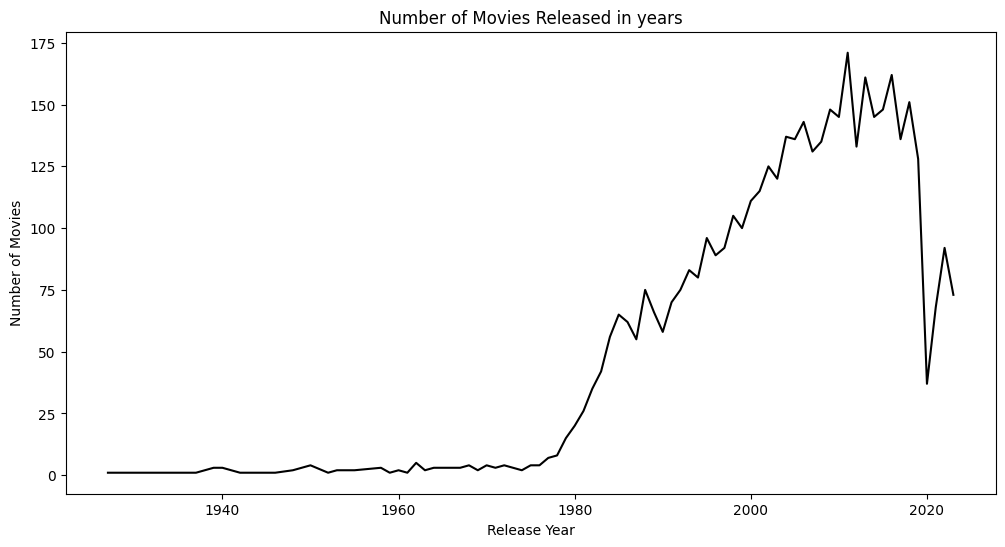

In [31]:
movie_count_by_year = imdb_df['Release Year'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
movie_count_by_year.plot(kind='line', color='black')
plt.title('Number of Movies Released in years')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')

# Display top 10 movies with highest ratings

In [32]:
top_rated_movies = imdb_df.nlargest(10, 'Rating (Out of 10)')[['Title', 'Rating (Out of 10)']]
print(top_rated_movies)

                                                  Title  Rating (Out of 10)
76                             The Shawshank Redemption                 9.3
61                                        The Godfather                 9.2
711                                     The Dark Knight                 9.0
1803                                   Schindler's List                 9.0
2350      The Lord of the Rings: The Return of the King                 9.0
2384                              The Godfather Part II                 9.0
728                                        Pulp Fiction                 8.9
725   The Lord of the Rings: The Fellowship of the Ring                 8.8
726                                          Fight Club                 8.8
731                                           Inception                 8.8


# Plot distribution of movie ratings

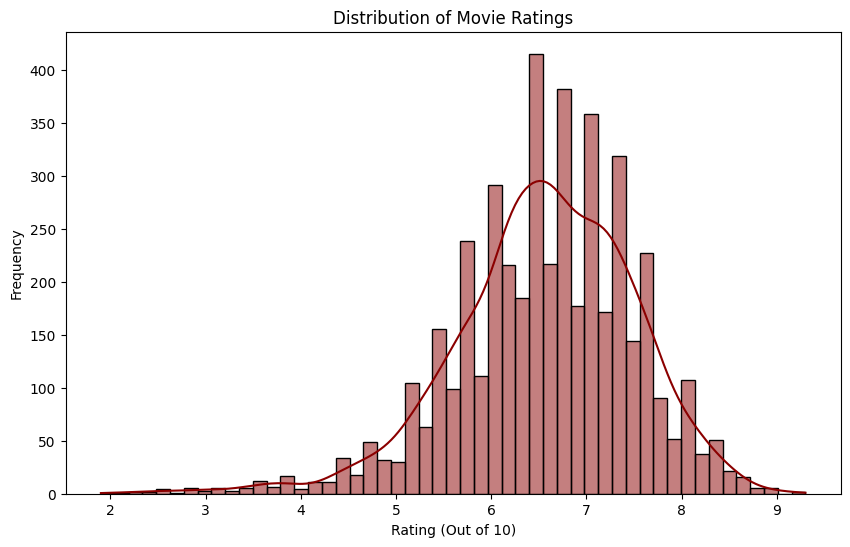

In [33]:
plt.figure(figsize=(10, 6))
sns.histplot(imdb_df['Rating (Out of 10)'], kde=True, color='darkred')
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating (Out of 10)')
plt.ylabel('Frequency')
plt.show()

# Plot distribution of movie released years

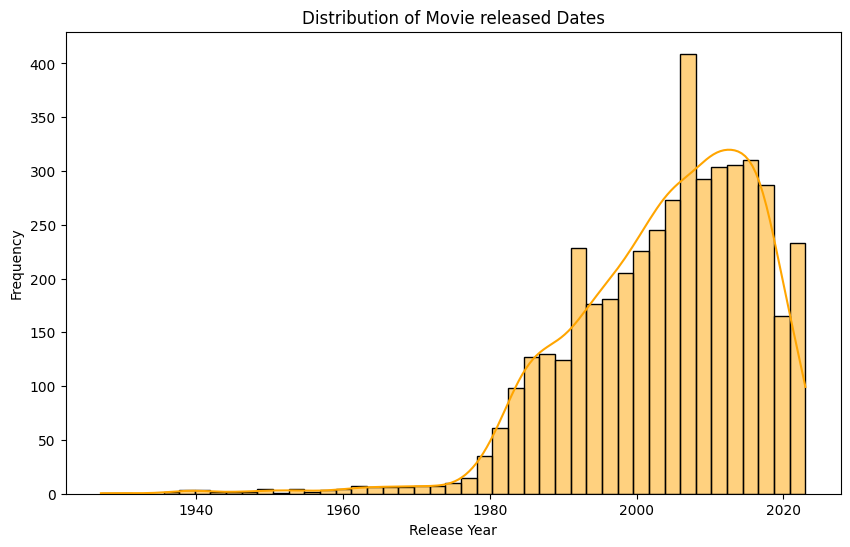

In [34]:
plt.figure(figsize=(10, 6))
sns.histplot(imdb_df['Release Year'], kde=True, color='orange')
plt.title('Distribution of Movie released Dates')
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.show()


# Extract and count genres and Plot the most common genres

Text(0, 0.5, 'Main Genres')

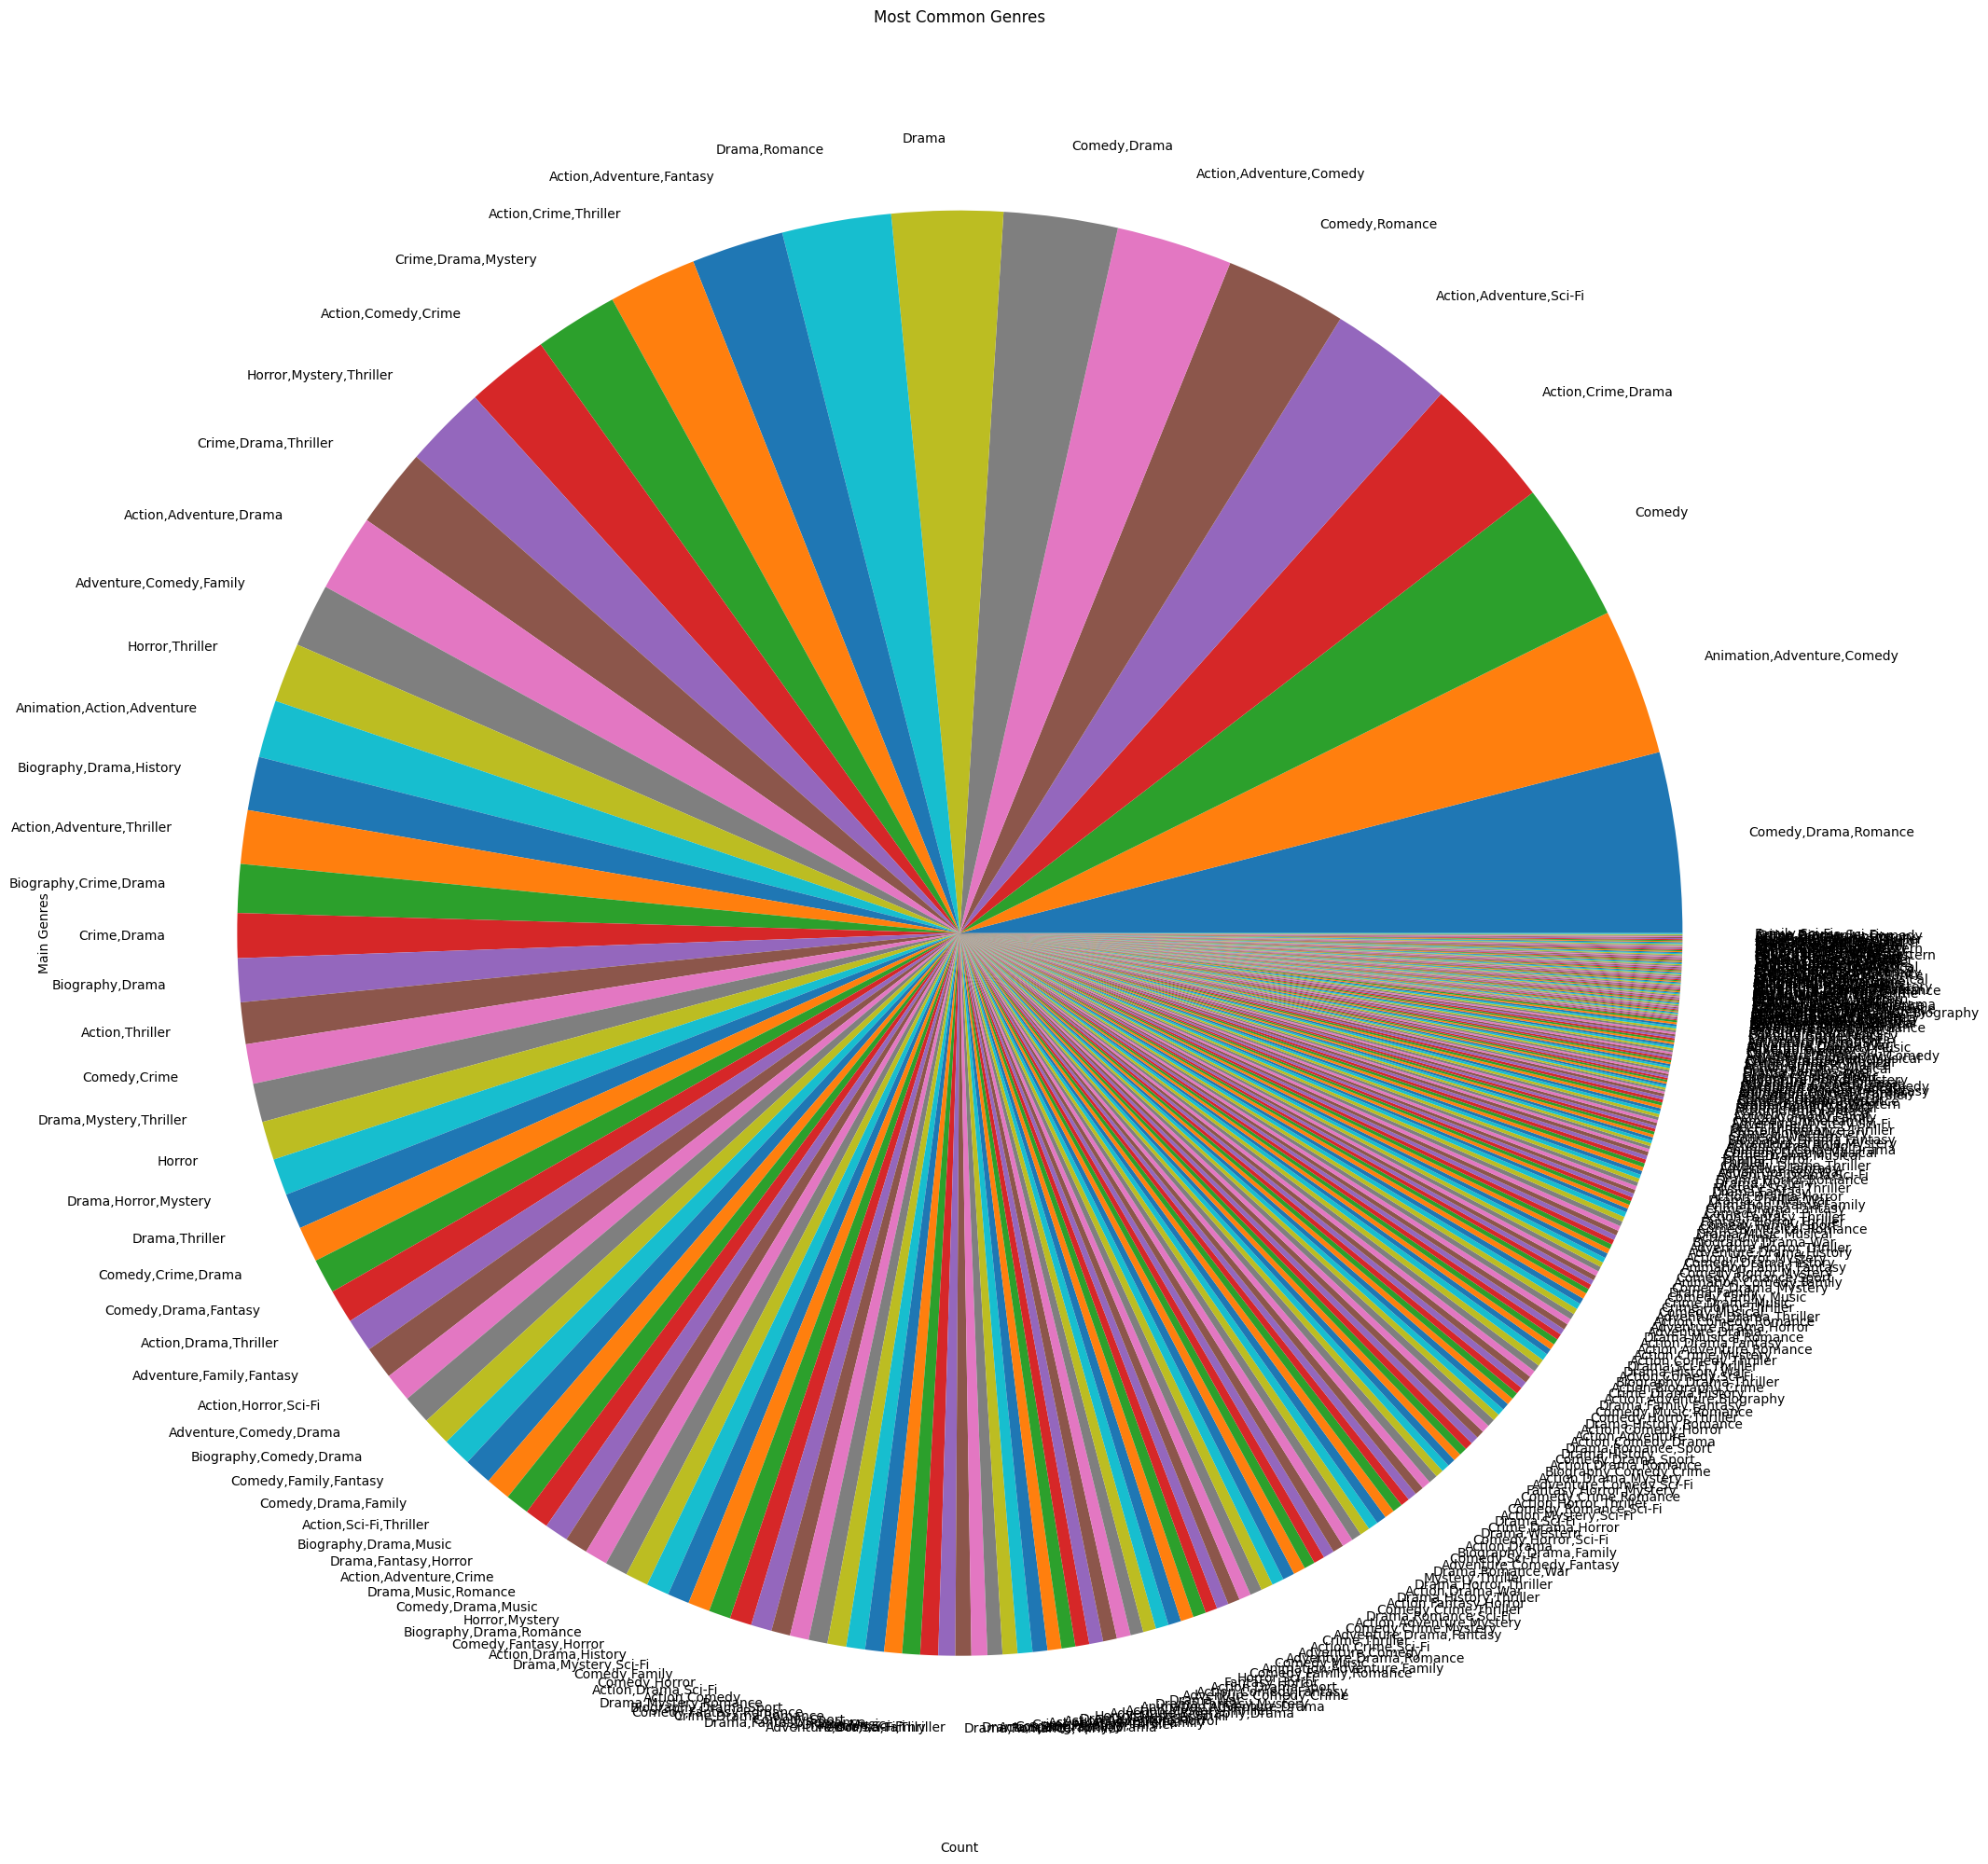

In [35]:
genres_count = imdb_df['Main Genres'].str.split(', ', expand=True).stack().value_counts()

plt.figure(figsize=(25, 150))
genres_count.plot(kind='pie', color='purple')
plt.title('Most Common Genres')
plt.xlabel('Count')
plt.ylabel('Main Genres')

# Plot correlation between released years and rating

Text(0, 0.5, 'Rating (Out of 10)')

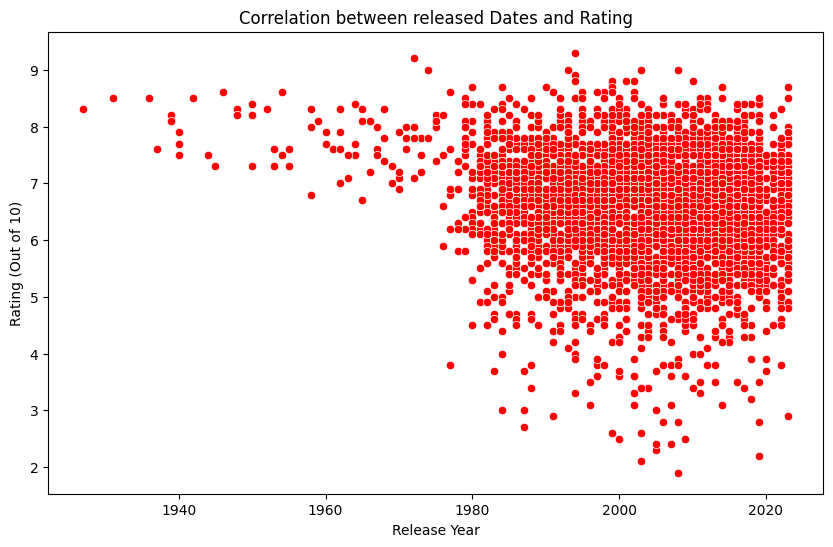

In [36]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Release Year', y='Rating (Out of 10)', data=imdb_df, color='red')
plt.title('Correlation between released Dates and Rating')
plt.xlabel('Release Year')
plt.ylabel('Rating (Out of 10)')

# Plot distribution of movie budgets

Text(0, 0.5, 'Frequency')

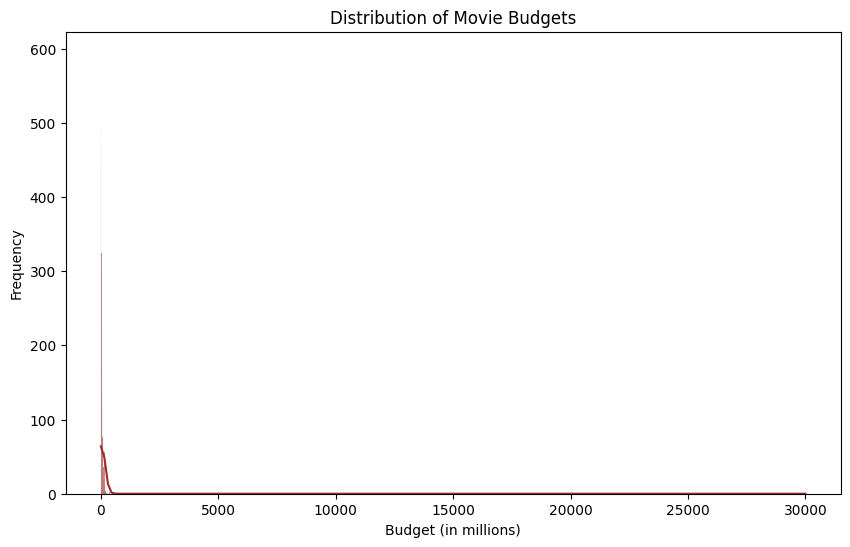

In [37]:
plt.figure(figsize=(10, 6))
sns.histplot(imdb_df['Budget (in millions)'], kde=True, color='brown')
plt.title('Distribution of Movie Budgets')
plt.xlabel('Budget (in millions)')
plt.ylabel('Frequency')

# Plot relationship between budget and Released years

Text(0, 0.5, 'Release Year')

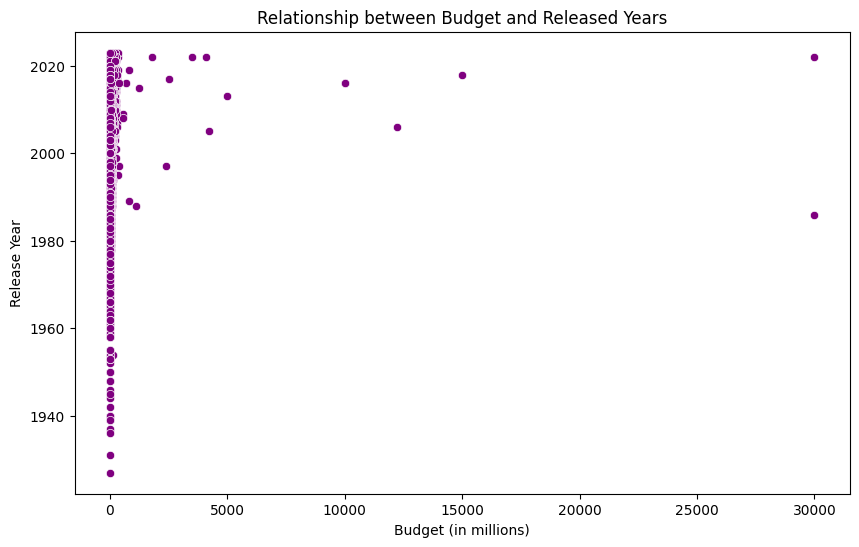

In [38]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Budget (in millions)', y='Release Year', data=imdb_df, color='purple')
plt.title('Relationship between Budget and Released Years')
plt.xlabel('Budget (in millions)')
plt.ylabel('Release Year')

# Plot distribution of movie Gross worldwide (in millions)

Text(0, 0.5, 'Frequency')

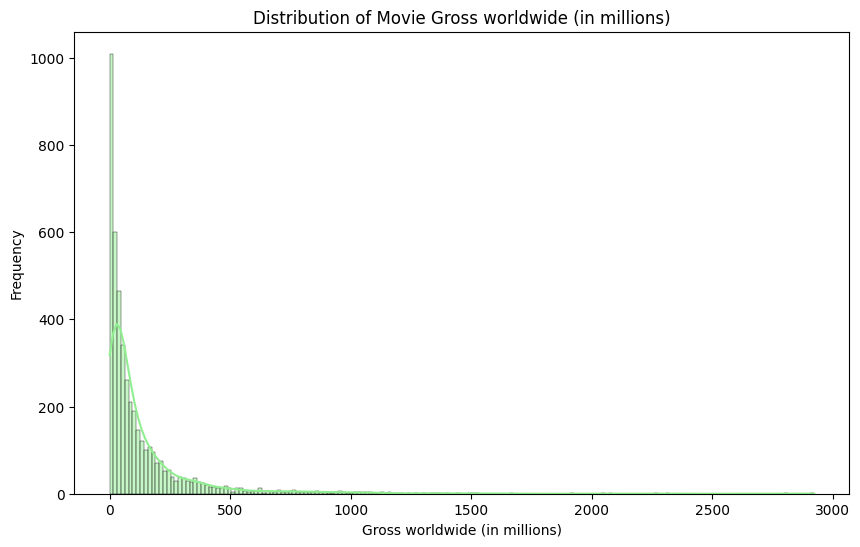

In [39]:
plt.figure(figsize=(10, 6))
sns.histplot(imdb_df['Gross worldwide (in millions)'], kde=True, color='lightgreen')
plt.title('Distribution of Movie Gross worldwide (in millions)')
plt.xlabel('Gross worldwide (in millions)')
plt.ylabel('Frequency')


# Plot correlation between Gross worldwide (in millions) and Budget (in millions)

Text(0, 0.5, 'Budget (in millions)')

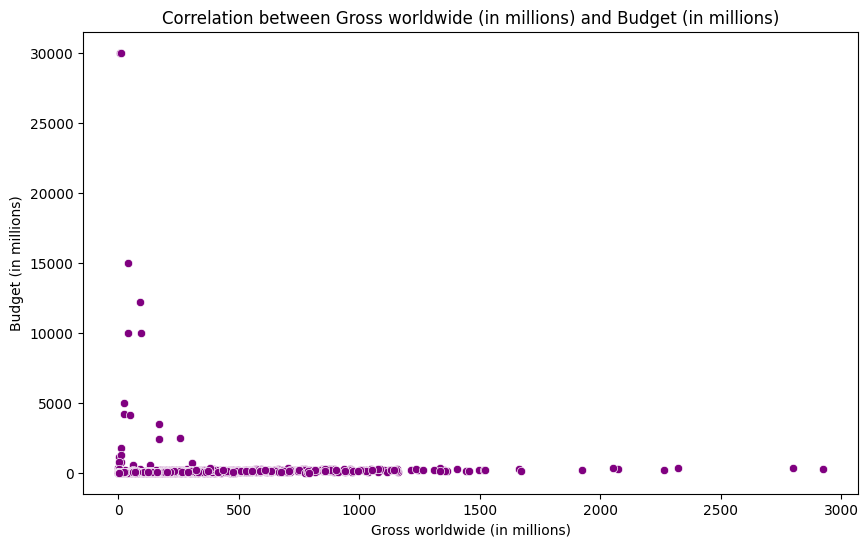

In [40]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Gross worldwide (in millions)', y='Budget (in millions)', data=imdb_df, color='purple')
plt.title('Correlation between Gross worldwide (in millions) and Budget (in millions)')
plt.xlabel('Gross worldwide (in millions)')
plt.ylabel('Budget (in millions)')

# Top 10 Directors with highest average ratings and Plot the result

Text(0, 0.5, 'Average Rating')

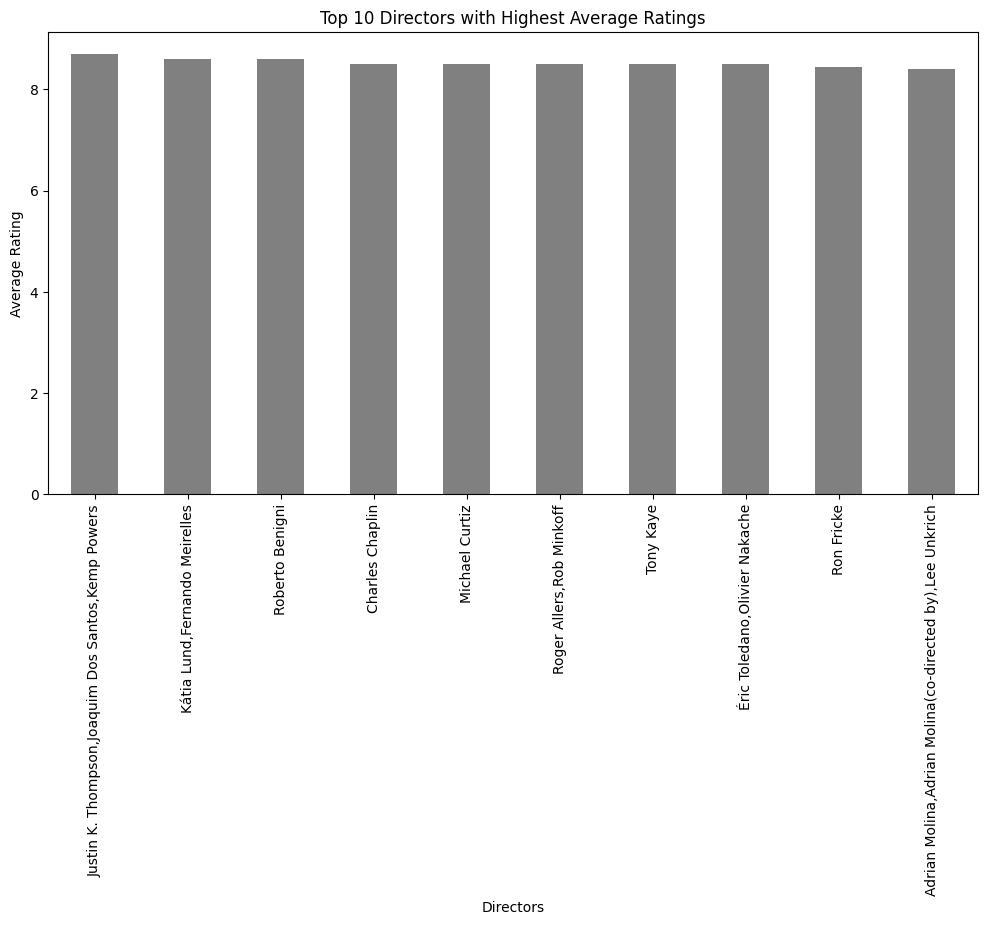

In [41]:
top_directors = imdb_df.groupby('Director')['Rating (Out of 10)'].mean().nlargest(10)

plt.figure(figsize=(12, 6))
top_directors.plot(kind='bar', color='grey')
plt.title('Top 10 Directors with Highest Average Ratings')
plt.xlabel('Directors')
plt.ylabel('Average Rating')

# Extract and count Motion Picture Rating and Plot the most common Motion Picture Rating

Text(0, 0.5, 'Motion Picture Rating')

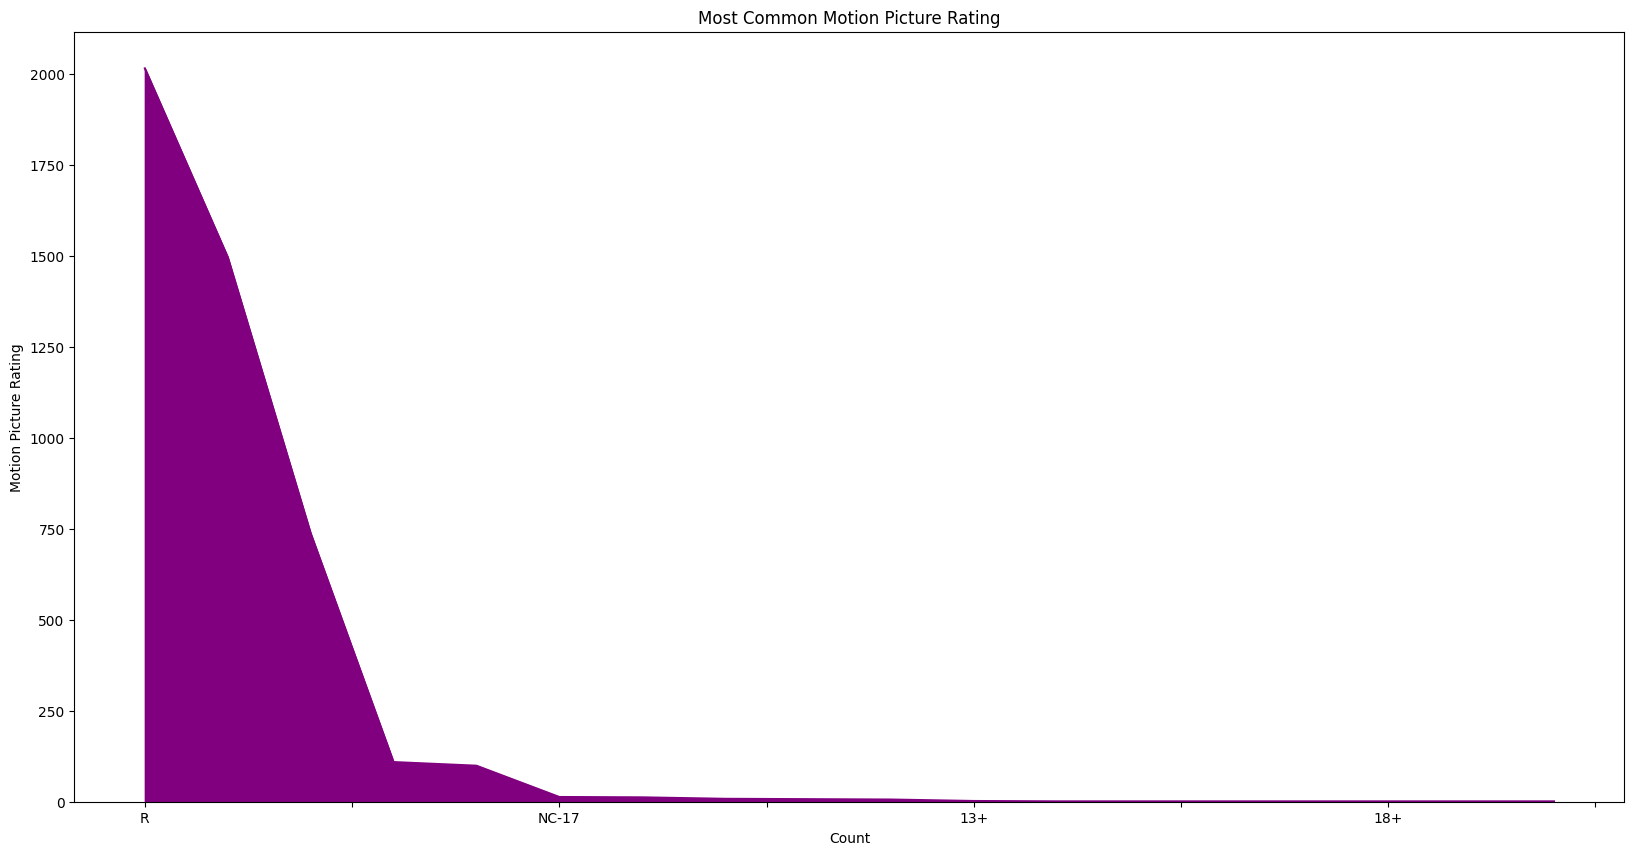

In [42]:
genres_count = imdb_df['Motion Picture Rating'].str.split(', ', expand=True).stack().value_counts()

plt.figure(figsize=(20, 10))
genres_count.plot(kind='area', color='purple')
plt.title('Most Common Motion Picture Rating')
plt.xlabel('Count')
plt.ylabel('Motion Picture Rating')

# Plot correlation between Motion Picture Rating and Number of Ratings (in thousands)

Text(0, 0.5, 'Motion Picture Rating')

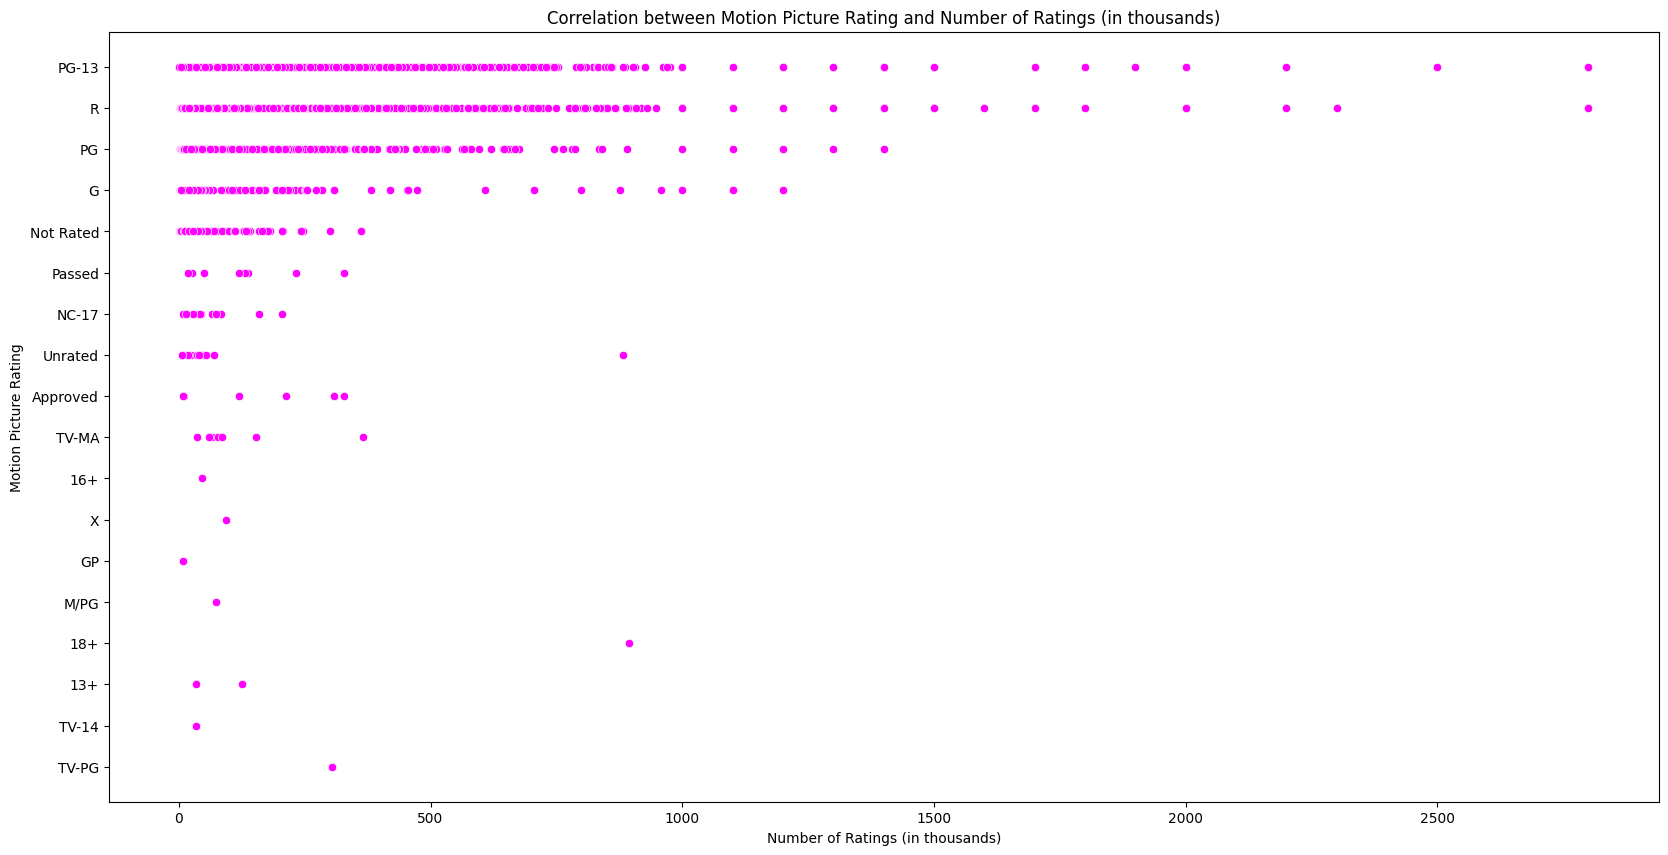

In [43]:
plt.figure(figsize=(20, 10))
sns.scatterplot(x='Number of Ratings (in thousands)', y='Motion Picture Rating', data=imdb_df, color='magenta')
plt.title('Correlation between Motion Picture Rating and Number of Ratings (in thousands)')
plt.xlabel('Number of Ratings (in thousands)')
plt.ylabel('Motion Picture Rating')

# Plot distribution of movie Runtime (Minutes)

Text(0, 0.5, 'Frequency')

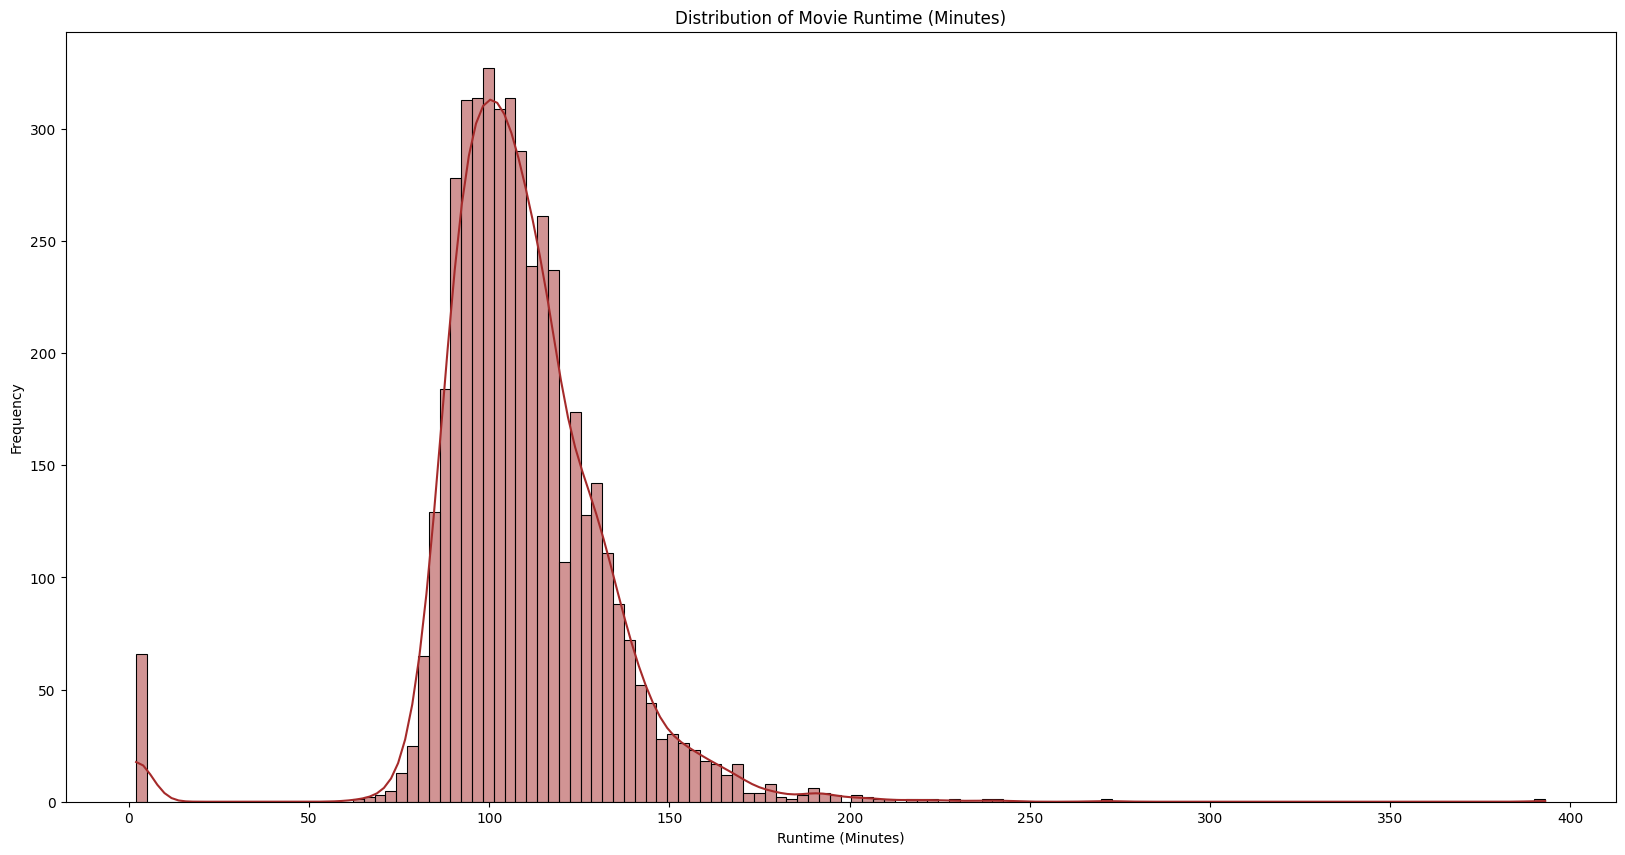

In [44]:
plt.figure(figsize=(20,10))
sns.histplot(imdb_df['Runtime (Minutes)'], kde=True, color='brown')
plt.title('Distribution of Movie Runtime (Minutes)')
plt.xlabel('Runtime (Minutes)')
plt.ylabel('Frequency')

# Plot relationship between Runtime (Minutes) and Gross Opening Weekend (in millions)

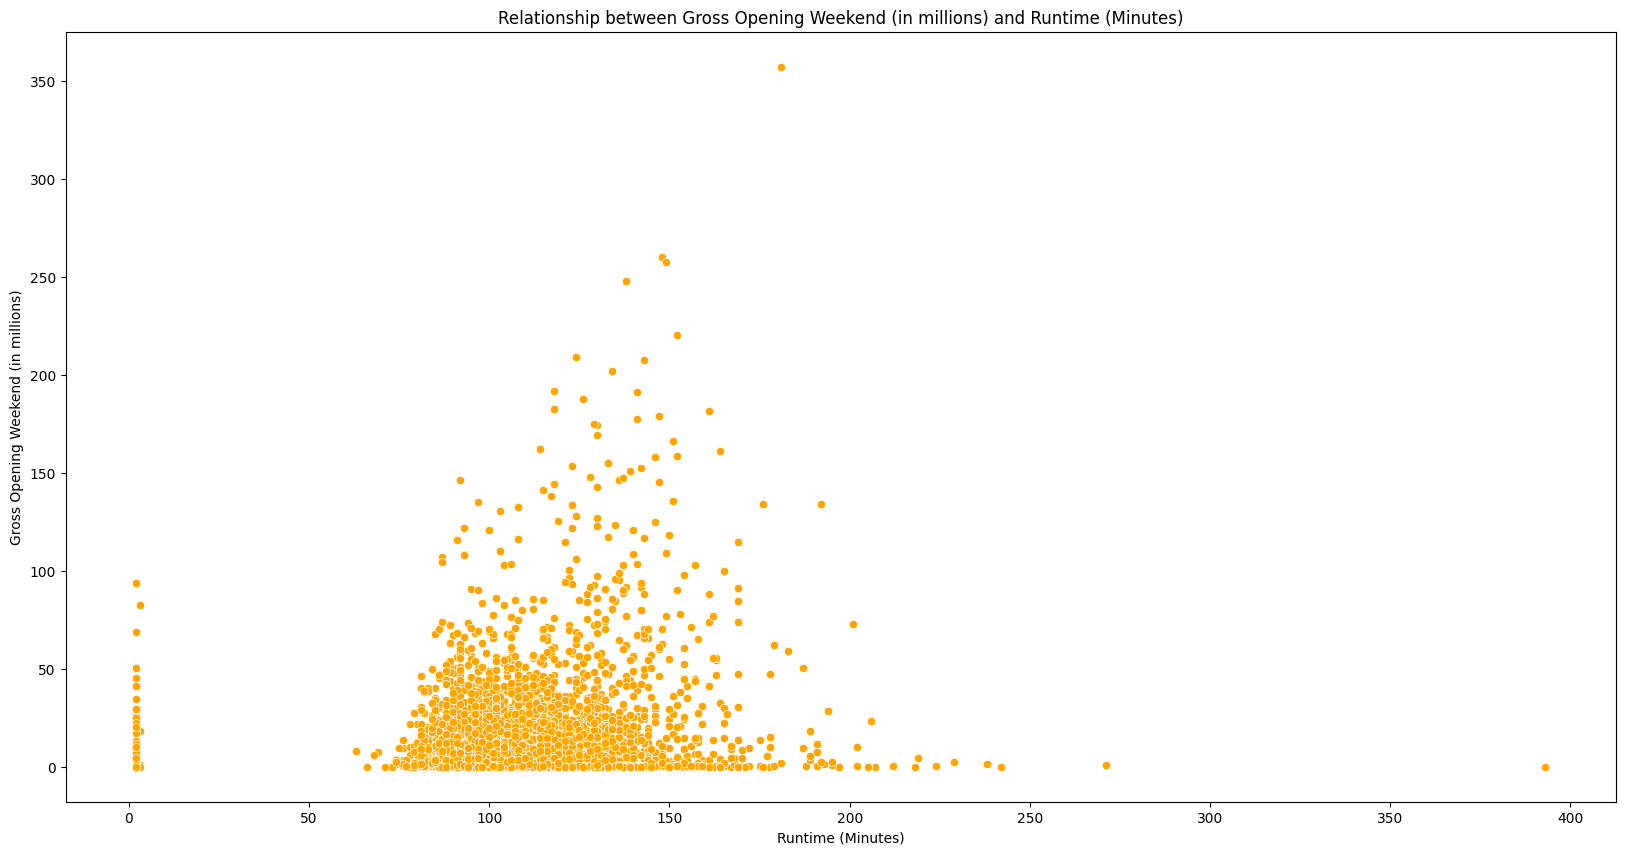

In [45]:
plt.figure(figsize=(20, 10))
sns.scatterplot(x='Runtime (Minutes)', y='Gross Opening Weekend (in millions)', data=imdb_df, color='orange')
plt.title('Relationship between Gross Opening Weekend (in millions) and Runtime (Minutes)')
plt.xlabel('Runtime (Minutes)')
plt.ylabel('Gross Opening Weekend (in millions)')
plt.show()